<h1 style="color:blue"><center>★ Wind Speed Prediction ★</center></h1>

<h1 style="color:#88bddb">Content</h1>

- 1.<a href="#1">Overview</a>
- 2.<a href="#2">Importing librarires</a>
- 3.<a href="#3">Load Dataset</a>
- 4.<a href="#4">Data Understanding</a>
- 5.<a href="#5">Data-Preparing</a>
- 6.<a href="#6">Modelling &  Evaluation</a>

<a id ="1"></a>
# 1.Overview

### Content

The dataset contains 6574 instances of daily averaged responses from an array of 5 weather variables sensors embedded in a meteorological station. The device was located on the field in a significantly empty area, at 21M. Data were recorded from January 1961 to December 1978 (17 years). Ground Truth daily averaged precipitations, maximum and minimum temperatures, and grass minimum temperature were provided.

### Context

High precision and reliable wind speed forecasting is a challenge for meteorologists. Severe wind due to convective storms, causes considerable damages (large scale forest damage, outage, buildings/houses damage, etc.). Convective events such as thunderstorms, tornadoes as well as large hail, strong winds, are natural hazards that have the potential to disrupt daily life, especially over complex terrain favoring the initiation of convection. Even ordinary convective events produce severe winds which causes fatal and costly damages. Therefore, wind speed prediction is an important task to get advanced severe weather warning. This dataset contains the responses of a weather sensor that collected different weather variables such as temperatures and precipitation.

### Attribute Information

- DATE (YYYY-MM-DD)
- WIND: Average wind speed [knots]
- IND: First indicator value
- RAIN: Precipitation Amount (mm)
- IND.1: Second indicator value
- T.MAX: Maximum Temperature (°C)
- IND.2: Third indicator value
- T.MIN: Minimum Temperature (°C)
- T.MIN.G: 09utc Grass Minimum Temperature (°C)

<a id="2"></a>
# 2.Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id="3"></a>
# 3.Load Dataset

In [ ]:
df = pd.read_csv('wind_dataset.csv')
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


<a id="4"></a>
# 4.Dataset Understanding &EDA

In [ ]:
df.isnull().sum()

DATE         0
WIND         0
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6574 non-null   float64
 2   IND      6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND.1    6513 non-null   float64
 5   T.MAX    5953 non-null   float64
 6   IND.2    6513 non-null   float64
 7   T.MIN    5900 non-null   float64
 8   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


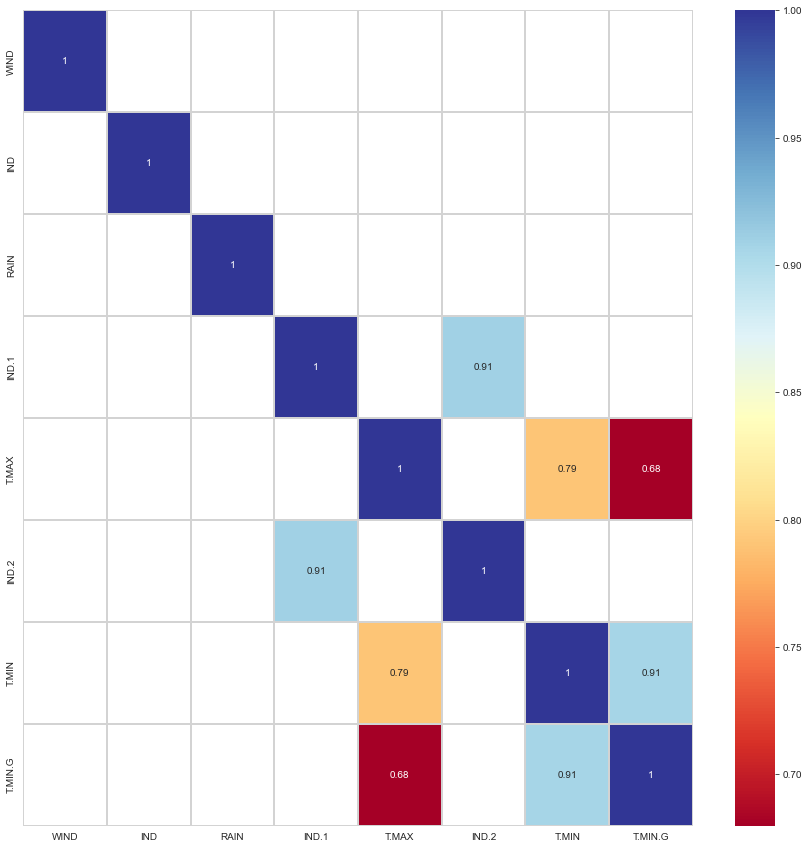

In [ ]:
plt.figure(figsize=(15,15))
threshold = 0.60
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2, 
            linecolor='lightgrey').set_facecolor('white')

In [ ]:
df.corrwith(df['WIND'])

WIND       1.000000
IND       -0.038578
RAIN       0.120876
IND.1      0.070512
T.MAX     -0.242559
IND.2      0.047860
T.MIN     -0.093014
T.MIN.G    0.012823
dtype: float64

<a id="5"></a>
# 5.Data Preparing

<h3 style="color:orange">Training</h3>

**Preparing train_set**

In [ ]:
train_set, test_set = train_test_split(df.drop('DATE',axis=1),test_size=0.3, random_state=45)
X_train = train_set.drop('WIND',axis=1)
y = train_set['WIND']
X_train.head()

,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
649,0,0.0,0.0,14.5,0.0,8.1,4.3
6041,0,5.3,0.0,20.9,0.0,13.3,11.1
4286,0,0.0,0.0,16.0,0.0,2.5,-1.7
5153,0,0.0,0.0,9.0,0.0,1.5,-5.6
411,0,0.0,0.0,8.8,0.0,6.3,5.5


In [ ]:
full_pipeline = Pipeline([
    ('standardization',StandardScaler()),
    ('filling_NaNs',SimpleImputer(strategy='median'))
])
X_train_prepared = full_pipeline.fit_transform(X_train)

<a id="6"></a>
# 6.Modelling

### Linera Regression

In [1]:
LR_model = LinearRegression()
LR_model.fit(X_train_prepared,y)

NameError: ignored

In [ ]:
prediction_on_training_data = LR_model.predict(X_train_prepared)

<h4 style="color:orange">Training Error or Evaluation</h4>

In [ ]:
from sklearn.metrics import mean_absolute_error


mae = mean_absolute_error(y,prediction_on_training_data)
print("MAE=",mae)

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y,prediction_on_training_data)
print("RMSE=", np.sqrt(mse))

<h3 style="color:orange">Test</h3>

In [ ]:
X_test = test_set.drop('WIND',axis=1)
y_test = test_set['WIND']

In [ ]:
X_test_prepared = full_pipeline.fit_transform(X_test)

In [ ]:
prediction_on_testing_data = LR_model.predict(X_test_prepared)

<h4 style="color:orange">Test Error or Evaluation</h4>

In [ ]:
from sklearn.metrics import mean_absolute_error


mae = mean_absolute_error(y_test,prediction_on_testing_data)
print("MAE=",mae)

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,prediction_on_testing_data)
print("RMSE=", np.sqrt(mse))

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor()
RF_model.fit(X_train_prepared,y)

RandomForestRegressor()

In [ ]:
rf_prediction_training_data = RF_model.predict(X_train_prepared)

<h4 style="color:orange">Training Error or Evaluation Random Forest</h4>

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y,rf_prediction_training_data)
print("MAE=",mae)

MAE= 1.392719483524299


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y,rf_prediction_training_data)
print("RMSE=", np.sqrt(mse))

RMSE= 1.8109158966417043


<h4 style="color:orange">Test Error or Evaluation Random Forest</h4>

In [ ]:
rf_prediction_testing_data = RF_model.predict(X_test_prepared)

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,rf_prediction_testing_data)
print("MAE=",mae)

MAE= 3.739429018152094


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,rf_prediction_testing_data)
print("RMSE=", np.sqrt(mse))

RMSE= 4.768121333727808


### Decesion Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor()
Tree_model.fit(X_train_prepared, y)

DecisionTreeRegressor()

In [ ]:
tree_prediction_training_data = Tree_model.predict(X_train_prepared)

<h4 style="color:orange">Training Error or Evaluation on Descesion Tree</h4>

In [ ]:
mae = mean_absolute_error(y,tree_prediction_training_data)
print("MAE=",mae)

MAE= 0.0624031007751938


In [ ]:
mse = mean_squared_error(y,tree_prediction_training_data)
print("RMSE=", np.sqrt(mse))

RMSE= 0.5282709586494158


<h4 style="color:orange">Testing Error or Evaluation on decesion Tree</h4>

In [ ]:
tree_prediction_testing_data = Tree_model.predict(X_test_prepared)

In [ ]:
mae = mean_absolute_error(y_test,tree_prediction_testing_data)
print("MAE=",mae)

MAE= 4.993154249028551


In [ ]:
mse = mean_squared_error(y_test,tree_prediction_testing_data)
print("RMSE=", np.sqrt(mse))

RMSE= 6.416905231181098


<h4 style="color:orange">Cross Validation</h4>

In [ ]:
from sklearn.model_selection import cross_val_score

mse_scores = cross_val_score(LR_model,X_train_prepared,y, scoring='neg_mean_squared_error',cv=5)

In [ ]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Std:",scores.std())
    

In [ ]:
display_scores(np.sqrt(-mse_scores))

Scores: [4.77012738 4.53561952 4.56874638 4.7495687  4.74379767]
Mean: 4.673571927524402
Std: 0.10004937051027697


In [ ]:
from sklearn.model_selection import cross_val_score

mse_scores = cross_val_score(LR_model,X_test_prepared,y_test, scoring='neg_mean_squared_error',cv=5)

In [ ]:
display_scores(np.sqrt(-mse_scores))

Scores: [4.90326149 4.7590756  4.70407013 4.60694713 4.75248759]
Mean: 4.745168385973352
Std: 0.09595268942330817


In [ ]:
mse_scores = cross_val_score(RF_model,X_train_prepared,y, scoring='neg_mean_squared_error',cv=5)

In [ ]:
display_scores(np.sqrt(-mse_scores))

Scores: [4.79920811 4.53170788 4.57586693 4.77686339 4.72781679]
Mean: 4.682292617151783
Std: 0.10833974667479945
